In [1]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib nbagg

#### Definitions. Fill in your own values here. If you used all default values for launching the search, only need to change exp_key

In [3]:
result_db_name = 'rllab'
exp_key = 'rossler-swimmer-hyper2'
host = 'localhost'
port = 1234

#### Connect to database (make sure mongodb is running)

In [4]:
client = MongoClient(host, port)
db = client[result_db_name]
jobs = db.jobs

#### Retrieve and format results

In [5]:
df = pd.DataFrame(list(jobs.find({'exp_key':exp_key})))
param_dicts = []
score_curves = []
for i in range(df.shape[0]):
    res = df.result.iat[i]
    if res['status'] == 'ok':
        resdict = res['params']
        resdict['score'] = -df.result[i]['loss']
        resdict['result_index'] = i
        score_curves.append(res['scores']) # this only works if your function to process results returns the learning curve
        param_dicts.append(resdict)
param_df = pd.DataFrame(param_dicts)

#### Results table

In [6]:
sorted_results = param_df.sort_values(by="score")
sorted_results

,best_frac,exp_name,extra_std,init_std,result_index,score
48,0.204243,rossler-swimmer-hyper2_12149_1,0.081388,0.945114,48,0.098819
5,0.246554,rossler-swimmer-hyper2_28765_1,0.008472,0.919050,5,0.535894
13,0.093817,rossler-swimmer-hyper2_952_1,0.016645,0.865159,13,56.695581
43,0.120061,rossler-swimmer-hyper2_11788_1,0.037534,0.678179,43,57.142692
46,0.103048,rossler-swimmer-hyper2_10504_1,0.088445,0.497063,46,57.157347
30,0.176709,rossler-swimmer-hyper2_7416_1,0.085031,0.459567,30,58.053872
6,0.067598,rossler-swimmer-hyper2_31585_1,0.052337,0.378338,6,58.103428
12,0.127083,rossler-swimmer-hyper2_818_1,0.070198,0.568829,12,58.111699
45,0.216969,rossler-swimmer-hyper2_12247_1,0.096368,0.693198,45,58.240465
33,0.248724,rossler-swimmer-hyper2_7499_1,0.074609,0.984795,33,59.306736


#### Learning curve of best parameter set

<IPython.core.display.Javascript object>


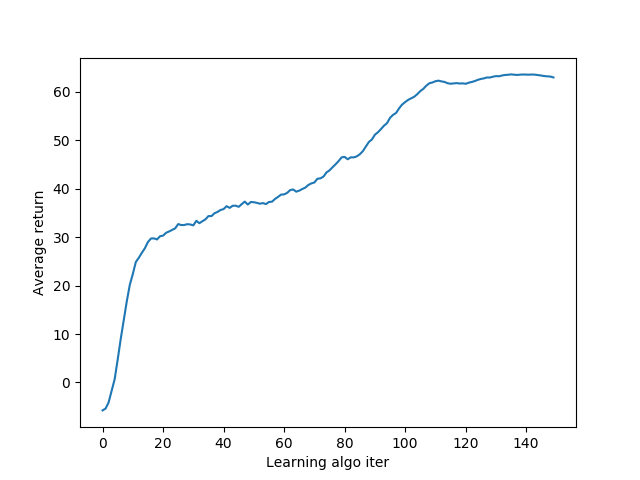

In [10]:
best_score_index = param_df.score.values.argmax()
plt.figure()
plt.plot(score_curves[best_score_index])
plt.xlabel('Learning algo iter')
plt.ylabel('Average return')

<IPython.core.display.Javascript object>


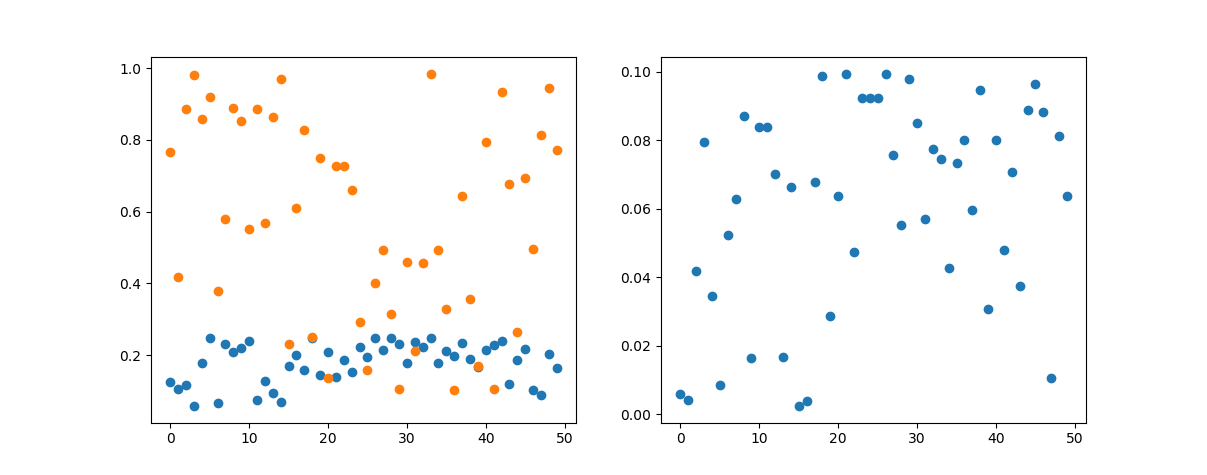

In [18]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(sorted_results.best_frac, 'o')
plt.plot(sorted_results.init_std, 'o')

plt.subplot(1,2,2)
plt.plot(sorted_results.extra_std, 'o')

#### Hyperopt score progression

<IPython.core.display.Javascript object>


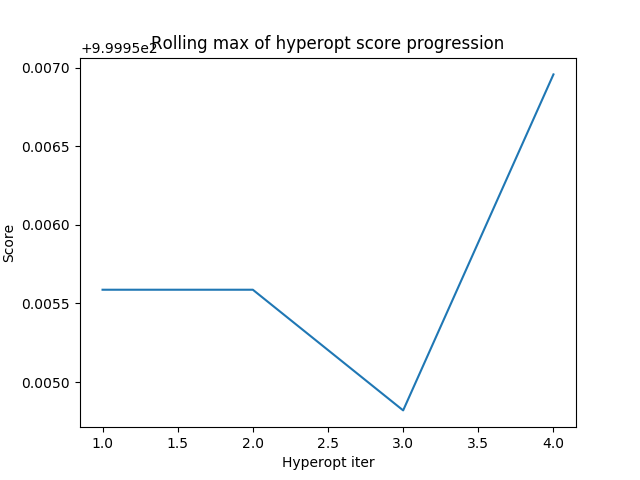

In [22]:
plt.figure()
plt.plot(param_df.score.rolling(window=2).max())
plt.title('Rolling max of hyperopt score progression')
plt.xlabel('Hyperopt iter')
plt.ylabel('Score')